### This notebook demonstrates how to generate a user weekly listening trend dataset for the Mood.fm project.

In [10]:
import pandas as pd
import numpy as np
np.random.seed(10)

In [11]:
file_path = '../../datasets/simulated_user_dataset.csv'
simulated_user_data = pd.read_csv(file_path)
simulated_user_data.head()

,Unnamed: 0,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels,uri,user_id,group_no
0,114604,246022.0,0.709,0.965,-2.686,0.2110,0.0320,0.025800,0.118,0.699,120.065,8.576469e-07,1,spotify:track:2QcbhQWfVD5QcTJzAtpYsg,1,2
1,199817,217187.0,0.552,0.463,-9.976,0.0292,0.4550,0.000166,0.103,0.498,79.312,1.344464e-07,0,spotify:track:3zsrxImXgoplvMZla6sXk4,1,2
2,32,266668.0,0.570,0.368,-9.128,0.0329,0.0514,0.000000,0.108,0.136,139.937,1.233744e-07,0,spotify:track:3tzlgaWjqZJX0fq2hiQW62,1,2
3,82712,170418.0,0.629,0.832,-5.633,0.0442,0.0547,0.203000,0.221,0.120,123.975,2.593623e-07,2,spotify:track:062ew4tNbEHK33H8QN3P6H,1,2
4,41910,312413.0,0.510,0.887,-5.569,0.0799,0.0194,0.000000,0.225,0.255,134.029,2.557512e-07,2,spotify:track:7lhULmqN96IMncW8iFxYMn,1,2


In [12]:
# Create Seven-Day Listening History
# For each user, we generate a sample of songs for each of the seven days, 
# ensuring that the sampled songs come from the user's group.

num_days = 7
songs_per_day = 50

seven_day_history = []

grouped_users = simulated_user_data.groupby('user_id')

for user_id, user_data in grouped_users:
    group_no = user_data['group_no'].iloc[0]
    for day in range(1, num_days + 1):
        # Sample songs for the current day
        day_sample = user_data.sample(n=songs_per_day, replace=True, random_state=day)
        day_sample['day'] = day
        day_sample['user_id'] = user_id
        day_sample['group_no'] = group_no
        seven_day_history.append(day_sample)

seven_day_history_df = pd.concat(seven_day_history, ignore_index=True)
seven_day_history_df.head()

,Unnamed: 0,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels,uri,user_id,group_no,day
0,230928,221382.0,0.797,0.920,-5.644,0.4040,0.126,0.000000,0.6670,0.693,95.021,1.824900e-06,1,spotify:track:1dUOw3hWQ5NvSuXwORubqP,1,2,1
1,166384,189467.0,0.710,0.932,-6.653,0.0769,0.121,0.000004,0.1140,0.796,112.915,4.058754e-07,1,spotify:track:2BEUGCeN9FBV3pA06fjLu4,1,2,1
2,142376,331431.0,0.834,0.580,-3.144,0.2800,0.446,0.000000,0.0719,0.481,91.970,8.448214e-07,1,spotify:track:0QQNA8bZqefrGfsShzlZkb,1,2,1
3,39378,282279.0,0.648,0.345,-9.540,0.0305,0.307,0.033200,0.0883,0.339,119.984,1.080491e-07,0,spotify:track:1ZUAgPi81AQK2k3Z11saov,1,2,1
4,156737,290227.0,0.705,0.587,-7.812,0.0342,0.119,0.647000,0.1620,0.933,122.729,1.178388e-07,1,spotify:track:6VolFTo5F64dV6S6vtOGKw,1,2,1


In [13]:
output_path = '../../datasets/seven_day_listening_history.csv'
seven_day_history_df.to_csv(output_path, index=False)
print(f'Seven-day listening history saved to {output_path}')

Seven-day listening history saved to ../../data/seven_day_listening_history.csv


----------------------------------------------------------------

### This plot shows the distribution of songs listened to by users each day over the seven-day period.

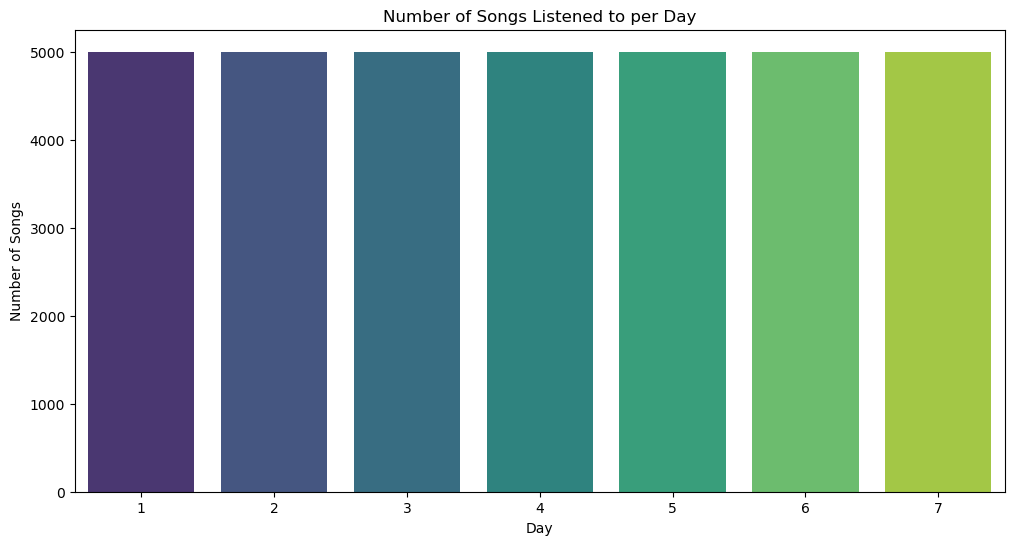

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(x='day', data=seven_day_history_df, palette="viridis")
plt.title('Number of Songs Listened to per Day')
plt.xlabel('Day')
plt.ylabel('Number of Songs')
plt.show()

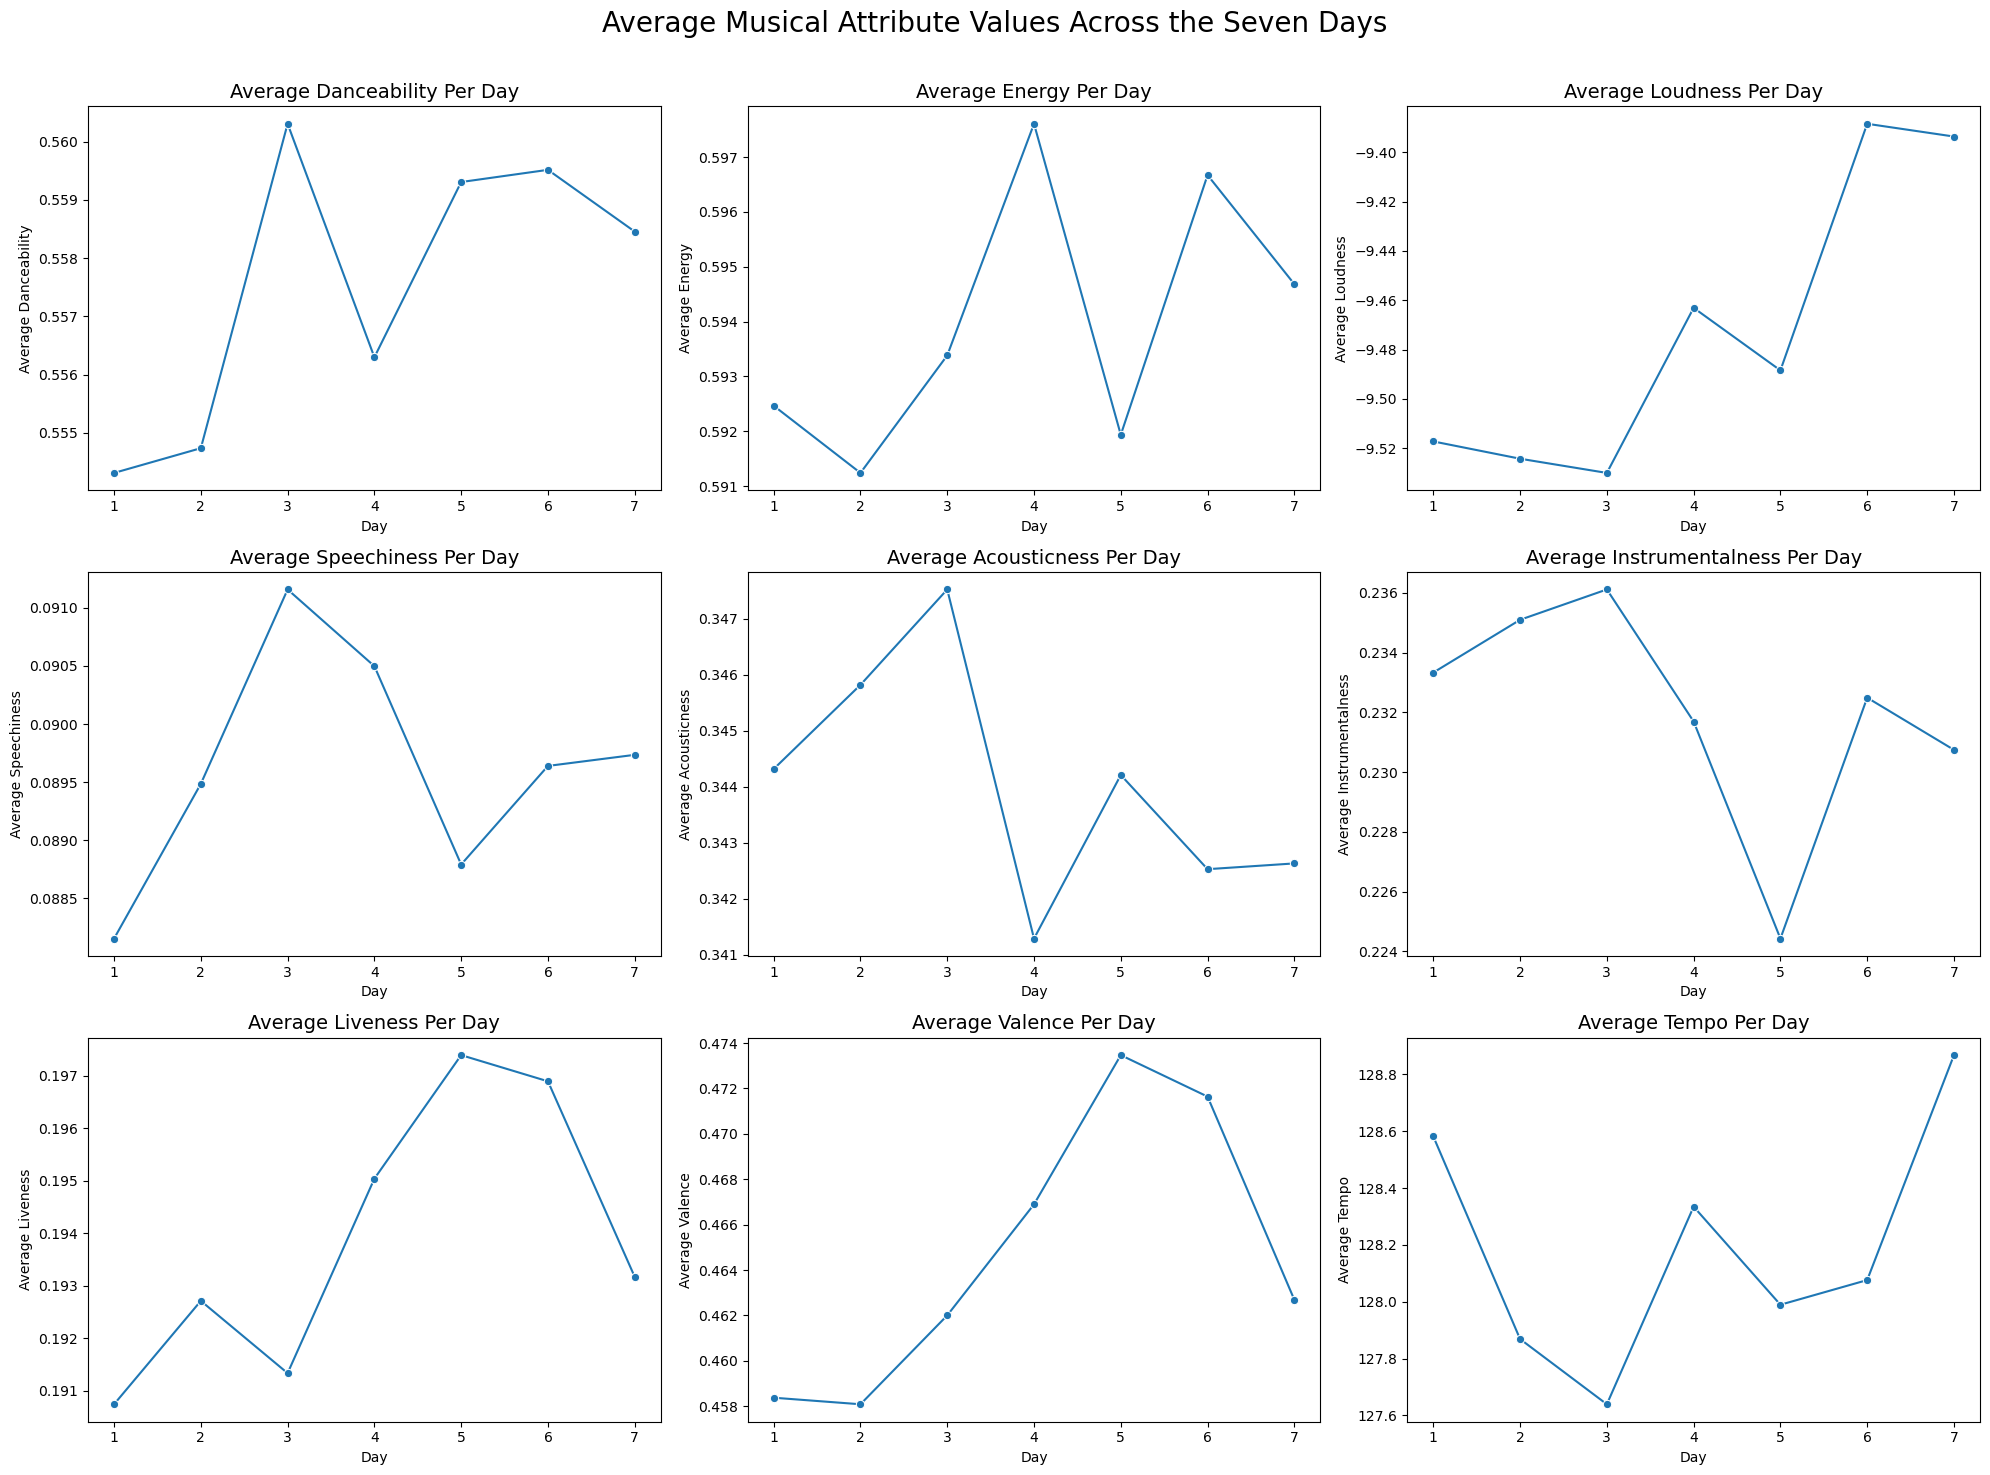

In [15]:
attributes = ['danceability', 'energy', 'loudness', 'speechiness', 
              'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
fig.suptitle('Average Musical Attribute Values Across the Seven Days', fontsize=20)

axes = axes.flatten()

for i, attr in enumerate(attributes):
    average_per_day = seven_day_history_df.groupby('day')[attr].mean()
    sns.lineplot(x=average_per_day.index, y=average_per_day.values, marker='o', ax=axes[i])
    axes[i].set_title(f'Average {attr.capitalize()} Per Day', fontsize=14)
    axes[i].set_xlabel('Day')
    axes[i].set_ylabel(f'Average {attr.capitalize()}')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

## Observations from the Average Musical Attribute Values Across the Seven Days

1. **Danceability**:
   - Peaks on day 3 and maintains relatively high values through days 4-6, indicating a preference for more danceable music midweek.

2. **Energy**:
   - Increases significantly on day 4, suggesting a higher energy preference midweek, followed by a gradual rise towards the weekend.

3. **Loudness**:
   - Rises steadily towards the weekend (days 6-7), indicating a preference for louder music as the week progresses.

4. **Speechiness**:
   - Peaks on day 3 and decreases afterwards, suggesting more vocal content in the middle of the week, with a slight increase again on days 6-7.

5. **Acousticness**:
   - Higher values early in the week (days 1-2) and drops sharply on day 4, reflecting a shift from acoustic to more electronic sounds midweek.

6. **Instrumentalness**:
   - Declines noticeably on day 4 and recovers towards the weekend, suggesting less instrumental music preference midweek.

7. **Liveness**:
   - Increases from day 3, peaking around days 5-6, indicating a tendency towards live or dynamic music closer to the weekend.

8. **Valence**:
   - Increases steadily from days 3 to 6, suggesting a trend towards happier or more positive music approaching the weekend.

9. **Tempo**:
   - Slightly lower midweek, with an upward trend towards days 6-7, indicating a preference for faster-paced music during the weekend.
